# Introduction to Quantum Circuits 

Through this notebook, we learn how to execute a basic command using Qiskit, a python package for quantum computation and simulation provided by IBM. 

Copy right: Prof. Ikeda at UMass Boston (kazuki.ikeda@umb.edu)

If you have not finished Linear Algebra yet, go to <a><a href="https://github.com/IKEDAKAZUKI/QIS-Lectures/blob/main/Linear%20Algebra.ipynb"> Linear Algebra.ipynb</a>.

<font size="4">
<div style="background-color: #FFFF99; padding: 10px;">
<h3>Table of Contents</h3>
    
1. [Install Qiskit](#qiskit) 

2. [Implementation of a qubit](#implementation) 
   
3. [Gate operations to one qubit](#gate_operation-1)
   
    [Exercise 1](#exercise-1): Measurment

4. [Rotation of one qubit](#rotation1)

    [Exercise 2](#exercise-2): 1 qubit rotation

5. [Tensor products](#tensor)

    [Exercise 3](#exercise-3): Tensor products

6. [Gate operations to two qubits](#gate_operation-2)

    [Exercise 4](#exercise-4): 2 qubit operation (CNOT, Bell states)
</div>
</font>

<a id="qiskit"></a>
# Install Qiskit 

If Qiskit is not installed, please install it.

In [27]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install qiskit_aer

  Obtaining dependency information for qiskit_aer from https://files.pythonhosted.org/packages/0b/7c/ddb8380c58bbcc56a4fd9e427532885ce49dbb95ecd3d044bdf98ee536fa/qiskit_aer-0.15.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.2 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136819 sha256=24b3a40caa5ab69722153c67c8c270027f94cb2879f927706912e6ebd2d0fce8
  Stored in directory: /Users/colinhoran/Library/Caches/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.


In [37]:
from qiskit_aer import Aer

In [41]:
import numpy as np
import matplotlib.pyplot as plt 
from qiskit import * #qiskit
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import partial_trace, entropy
import qiskit.quantum_info as qi

from IPython.display import HTML, display

Here we use a quantum simulator

In [43]:
#replace job = execute (qc0, simulator, shots=shots) with following:
#temp_circuit = transpile(qc0,simulator)
#job = simulator.run(temp_circuit, shots = shots)

In [49]:
simulator = Aer.get_backend('qasm_simulator')

<a id="implementation"></a>
# Implementation of a qubit

As a trivial example, we create a single qubit state $|0\rangle$, by the following circuit

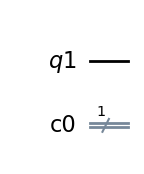

In [51]:
n_qubit = 1
qr0 = QuantumRegister(n_qubit)
cr0 = ClassicalRegister(n_qubit) #classical register to store resulting bits
qc0 = QuantumCircuit(qr0,cr0) #quantum circuit with quantum and classical registers

qc0.draw('mpl')

Confirm that the state is generated successfully, by measuring the state.
In the following code, "shots" refer to the number of times a quantum circuit is run.
In our case, it simply means we measure the state $|0\rangle$ 1000 times. 

Since this is a simulator, there is no noize. Therefore the same outcome 0 will be generated always. 

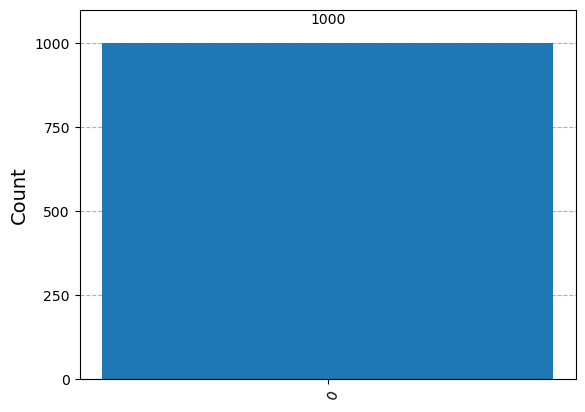

In [55]:

qc0.measure(qr0,cr0)

# shots is number of execution
shots=1000

# execute the circuit
temp_circuit = transpile(qc0,simulator)
job = simulator.run(temp_circuit, shots = shots)

# get a result
result = job.result() 

# get counts to obtain each bit string
counts = result.get_counts(qc0) 

# plot histogram
plot_histogram(counts) 

<a id="gate_operation-1"></a>
# Gate operations to one qubit.

<a id="hadamard"></a>
Let $|0\rangle$ be our initial state and apply a unitary gate $U$ to it, by which the intial state is mapped to a state $U|0\rangle$. 

For example, we can create a state $$\frac{|0\rangle+|1\rangle}{\sqrt{2}}$$ by using an <b>Hadamard operator</b> $$H=\frac{1}{\sqrt{2}}\begin{pmatrix}1&1\\1&-1\end{pmatrix}$$

In fact, we can check that 
$$H|0\rangle=\frac{1}{\sqrt{2}}\begin{pmatrix}1&1\\1&-1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix}=\frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix}=\frac{|0\rangle+|1\rangle}{\sqrt{2}}$$


Now let's implemente this operation. 

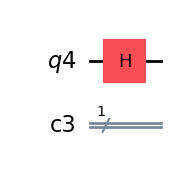

In [69]:
n_qubit = 1
qr1 = QuantumRegister(n_qubit)
cr1 = ClassicalRegister(n_qubit) #classical register to store resulting bits
qc1 = QuantumCircuit(qr1,cr1) #quantum circuit with quantum and classical registers

qc1.h(qr1[0])

qc1.draw('mpl')

Let's see what we will get by measuring this circuit. 
Since we have a <b>superposition</b> of $|0\rangle$ and $|1\rangle$ states $\left(|\psi\rangle=\frac{|0\rangle+|1\rangle}{\sqrt{2}}\right)$, the histgram of the measurment results is determinded by the probability distributions of the states:  
$$Prob(0)=|\langle0|\psi\rangle|^2=\frac{1}{2}$$
$$Prob(1)=|\langle1|\psi\rangle|^2=\frac{1}{2}$$

We can confirm this by measuring the state $|\psi\rangle$ many times. The larger "shots" becomes, the smaller the statistical error becomes: 0 and 1 come out with equal probability.  

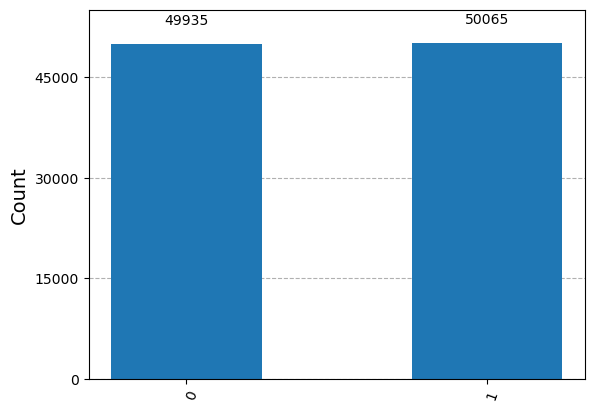

In [71]:
qc1.measure(qr1,cr1)

# shots is number of execution
shots=100000

# execute the circuit
temp_circuit = transpile(qc1,simulator)
job = simulator.run(temp_circuit, shots = shots)

# get a result
result = job.result() 

# get counts to obtain each bit string
counts = result.get_counts(qc1) 


# plot histogram
plot_histogram(counts) 

<a id="exercise-1"></a>
## Exercise 1
Change shots, say 10, 100, 1000, 10000 and plot histograms with different shots. 

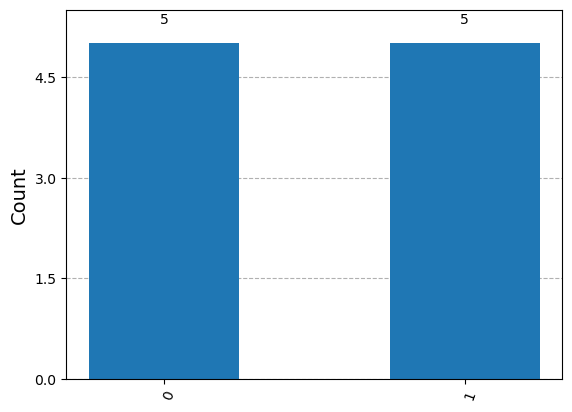

In [81]:
qc1.measure(qr1,cr1)

# shots is number of execution
shots=10

# execute the circuit
temp_circuit = transpile(qc1,simulator)
job = simulator.run(temp_circuit, shots = shots)

# get a result
result = job.result() 

# get counts to obtain each bit string
counts = result.get_counts(qc1) 


# plot histogram
plot_histogram(counts) 

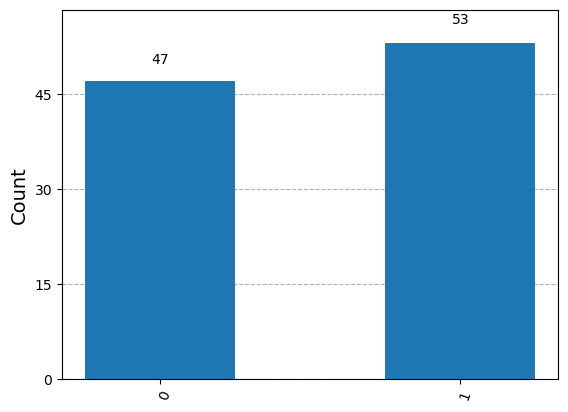

In [83]:
qc1.measure(qr1,cr1)

# shots is number of execution
shots=100

# execute the circuit
temp_circuit = transpile(qc1,simulator)
job = simulator.run(temp_circuit, shots = shots)

# get a result
result = job.result() 

# get counts to obtain each bit string
counts = result.get_counts(qc1) 


# plot histogram
plot_histogram(counts) 

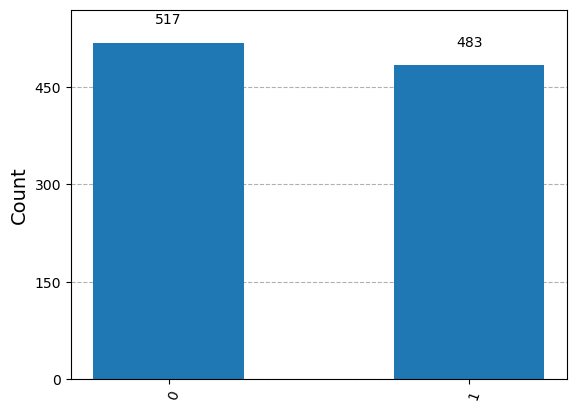

In [85]:
qc1.measure(qr1,cr1)

# shots is number of execution
shots=1000

# execute the circuit
temp_circuit = transpile(qc1,simulator)
job = simulator.run(temp_circuit, shots = shots)

# get a result
result = job.result() 

# get counts to obtain each bit string
counts = result.get_counts(qc1) 


# plot histogram
plot_histogram(counts) 

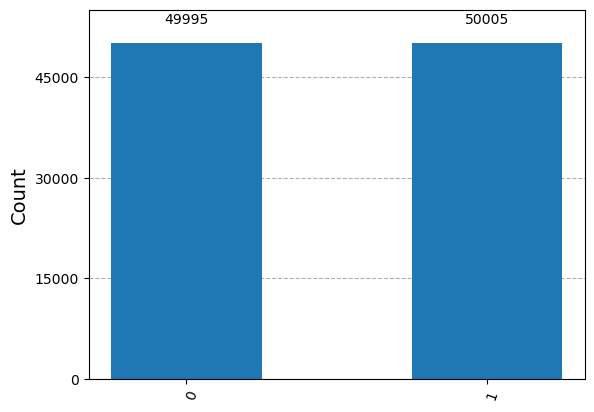

In [87]:
qc1.measure(qr1,cr1)

# shots is number of execution
shots=100000

# execute the circuit
temp_circuit = transpile(qc1,simulator)
job = simulator.run(temp_circuit, shots = shots)

# get a result
result = job.result() 

# get counts to obtain each bit string
counts = result.get_counts(qc1) 


# plot histogram
plot_histogram(counts) 

<a id="rotation1"></a>
# Rotation of one qubit

A general one qubit state is expressed by a linear combination
$$|\psi\rangle=\alpha|0\rangle+\beta|1\rangle,$$
where $\alpha$ and $\beta$ are complex numbers such that $|\alpha|^2+|\beta|^2=1$. By measuring this state, one gets 0 with probability $|\alpha|^2$ and $1$ with probability $|\beta|^2$. 

An alternative expression of such a state is given by 
$$|\psi\rangle=\cos(\theta/2)|0\rangle+e^{i\phi}\sin(\theta/2)|1\rangle$$

The most general one qubit rotation gate $U$ is given by 
$$U(\theta,\phi,\lambda)=\begin{pmatrix}
\cos(\theta/2)&-e^{i\lambda}\sin(\theta/2)\\
e^{i\phi}\sin(\theta/2)&e^{i(\phi+\lambda)}\cos(\theta/2). 
\end{pmatrix}$$

One can confirm that $|\psi\rangle$ is generated by $|\psi\rangle=U(\theta,\phi,\lambda)|0\rangle,$ where $\lambda$ is an arbitrary number. 

In Qiskit, a general $U(\theta,\phi,\lambda)$ gate can be called by "$u(\theta,\phi,\lambda)$". The following is an example. For more detals, see <a><a href="https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.UGate">the Documentation</a>. 

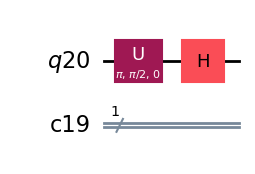

In [113]:
from math import pi

n_qubit = 1
qr2 = QuantumRegister(n_qubit)
cr2 = ClassicalRegister(n_qubit) #classical register to store resulting bits
qc2 = QuantumCircuit(qr2,cr2) #quantum circuit with quantum and classical registers

qc2.u(pi,pi/2,0,qr2) # U(\theta,\phi,\lambda)
qc2.draw()

qc2.draw('mpl')
qc2.h(qr2[0])

qc2.draw('mpl')

<a id="exercise-2"></a>
## Exercise 2
What is an operator $U$ that generates the following state?: 
$$\frac{|0\rangle-i|1\rangle}{\sqrt{2}}=U|0\rangle$$ 

Implement your operator (construct the circuit) and plot a histogram. 

Hint: There are two ways: use a single unitary operator $u(\theta,\phi,\lambda)$ or combine two operators. For example,
use an Hadamard operator $H$ and phase rotation $P(\theta)=\begin{pmatrix}
1&0\\
0&e^{i\theta}
\end{pmatrix}$. Also note the formula $e^{i\theta}=\cos\theta+i\sin\theta.$

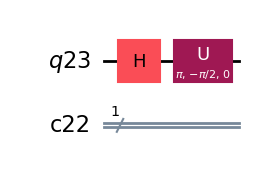

In [131]:
from math import pi

n_qubit = 1
qr2 = QuantumRegister(n_qubit)
cr2 = ClassicalRegister(n_qubit) #classical register to store resulting bits
qc2 = QuantumCircuit(qr2,cr2) #quantum circuit with quantum and classical registers

qc2.h(qr2[0])
qc2.u(pi,-pi/2,0,qr2) # U(\theta,\phi,\lambda)
qc2.draw()

qc2.draw('mpl')


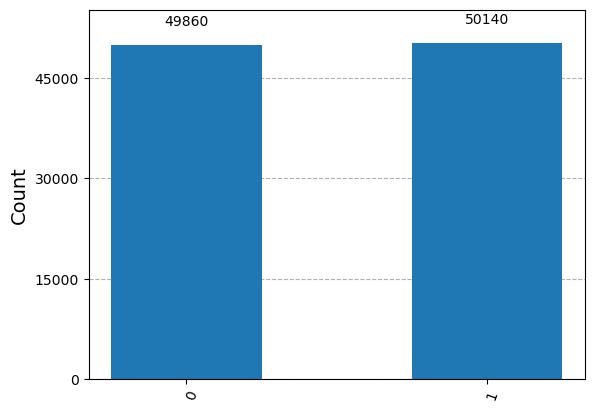

In [133]:
qc2.measure(qr2,cr2)

# shots is number of execution
shots=100000

# execute the circuit
temp_circuit = transpile(qc2,simulator)
job = simulator.run(temp_circuit, shots = shots)

# get a result
result = job.result() 

# get counts to obtain each bit string
counts = result.get_counts(qc2) 


# plot histogram
plot_histogram(counts) 

<a id="tensor"></a>
# Tensor products

Here we learn quantum operations to two qubits. 
It is strightforward to work with multiple qubits, by addding qubits to a circuit. 
The following circuit cretaes an tensor product of two $|0\rangle$s, which is commonly written as $|00\rangle$ or $|0\rangle\otimes|0\rangle$. 

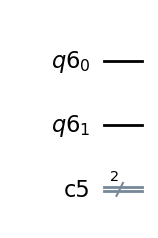

In [75]:
n_qubit = 2
qr3 = QuantumRegister(n_qubit)
cr3 = ClassicalRegister(n_qubit) #classical register to store resulting bits
qc3 = QuantumCircuit(qr3,cr3) #quantum circuit with quantum and classical registers

qc3.draw('mpl')

To describe two-qubit states more mathematically, here we introduce the concept of <b>Tensor product</b> of two states $|u\rangle,|v\rangle$, which is written as $|uv\rangle$ or $|u\rangle\otimes|v\rangle$ 


As a basic example, we only work with a tensor product two one-qubits. The vector repreentation of 0 and 1 states are given as follows: 
$$|0\rangle=\begin{pmatrix}1\\0\end{pmatrix},~|1\rangle=\begin{pmatrix}0\\1\end{pmatrix}.$$

In general, a two-qubit state is expressed by a liniear combination of $|00\rangle,|01\rangle,|10\rangle,|11\rangle$:
$$|\psi\rangle=a_{00}|00\rangle+a_{01}|01\rangle+a_{10}|10\rangle+a_{11}|11\rangle,$$
where $a_{ij}$ are complex numbers such that $\sum_{ij}|a_{ij}|^2=1$.  

Let us accept the following expressions of the tensor products: 
$$|00\rangle=\begin{pmatrix}1\\0\\0\\0\end{pmatrix},|01\rangle=\begin{pmatrix}0\\1\\0\\0\end{pmatrix},|10\rangle=\begin{pmatrix}0\\0\\1\\0\end{pmatrix},|11\rangle=\begin{pmatrix}0\\0\\0\\1\end{pmatrix}$$

Then any two-qubit state $|\psi\rangle$ can be represented by a four-dimensional vector: 
$$|\psi\rangle=a_{00}|00\rangle+a_{01}|01\rangle+a_{10}|10\rangle+a_{11}|11\rangle=\begin{pmatrix}a_{00}\\a_{01}\\a_{10}\\a_{11}\end{pmatrix}$$



<a id="exercise-3"></a>
## Exercise 3

Write down the following state as a four-dimensional vector: 
$$|\Phi^+\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}}$$

Your Answer: 

In [163]:
#phi array print

from numpy import array
ArrayA=np.array([1,0,0,1])
Phiplus=np.dot(np.sqrt(1/2),(ArrayA))
print(Phiplus)


[0.70710678 0.         0.         0.70710678]


<a id="gate_operation-2"></a>
# Gate operations to two qubits.

<a id="cnot"></a>
The goal of the following part is to undestand what makes two qubit operations fundamentally different from simply adding qubits. 
The following is one of the most important operators, called <b>CNOT gate</b>,

$$CNOT=|0\rangle\langle0|\otimes I+|1\rangle\langle1|\otimes X=\begin{pmatrix}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0 \end{pmatrix},$$
which acts on the second qubit (target qubit) when the first qubit (control) is $|1\rangle$. The table below shows the correspondence between inputs and the outputs.  

<table>
    <tr>
        <th> Input states </th>
        <th> $|00\rangle$ </th>
        <th> $|01\rangle$ </th>
        <th> $|10\rangle$ </th> 
        <th> $|11\rangle$ </th> 
    </tr>
    <tr>
        <th> Output states </th>
        <td>$|00\rangle$</td>
        <td>$|01\rangle$</td>
        <td>$|11\rangle$</td>
        <td>$|10\rangle$</td>
    </tr>
</table>

A CNOT gate can be implemented by putting "<b>cx(control,target)</b>" and expressed by the following circuit

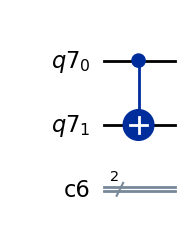

In [77]:
n_qubit = 2
qr4 = QuantumRegister(n_qubit)
cr4 = ClassicalRegister(n_qubit) #classical register to store resulting bits
qc4 = QuantumCircuit(qr4,cr4) #quantum circuit with quantum and classical registers
qc4.cx(qr4[0],qr4[1])

qc4.draw('mpl')

Why is CNOT important? To answer this question, we introduce the concept of <b>Entanglement</b>, which distinguishes quantum states from classical states. 

A two-qubit state $|\psi\rangle$ is called <b>Pure</b> if it can be written as a tensor product of two one-qubits: 
$$|\psi\rangle=|\varphi\rangle\otimes|\varphi_2\rangle,$$
where $|\varphi_{1}\rangle$ and $|\varphi_{2}\rangle$ are one-qubits. For example, $|00\rangle$ is a pure state. 

<a id="bell"></a>
A two-qubit state $|\psi\rangle$ is called <b>Entangled</b> if it is not pure. Here we give standard examples of entangled states, calle <b>Bell states</b>: 
$$|\Phi^+\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}},|\Phi^-\rangle=\frac{|00\rangle-|11\rangle}{\sqrt{2}},|\Psi^+\rangle=\frac{|01\rangle+|01\rangle}{\sqrt{2}},|\Psi^-\rangle=\frac{|01\rangle-|01\rangle}{\sqrt{2}}$$

If you have completed <b>[Exercise 3](#exercise-3)</b>, you are already familiar with them. 

Here we learn how implement $|\Phi^+\rangle$ on a quantum circuit. The initial state is $|00\rangle$ as usual.  
We first apply an <b>[Hadamard gate](#hadamard)</b> to the first qubit. Then we get the following state
$$(H|0\rangle)\otimes|0\rangle=\frac{|0\rangle+|1\rangle}{\sqrt{2}}\otimes|0\rangle=\frac{|00\rangle+|10\rangle}{\sqrt{2}}$$

This state is already very close to $|\Phi^+\rangle$! The remaining thing is only to flip the second qubit from $|10\rangle$ to $|11\rangle$ while keeping the other part unchanged. For this, let's get back to the definition of <b>[CNOT](#cnot)</b>:

$$|\Phi^+\rangle=CNOT\left(\frac{|00\rangle+|10\rangle}{\sqrt{2}}\right).$$

In conclusion, one of the Bell states $|\Phi^+\rangle$ can be implemented by the following circuit. 

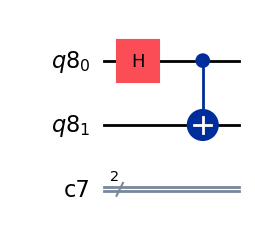

In [79]:
n_qubit = 2
qr5 = QuantumRegister(n_qubit)
cr5 = ClassicalRegister(n_qubit) #classical register to store resulting bits
qc5 = QuantumCircuit(qr5,cr5) #quantum circuit with quantum and classical registers

qc5.h(qr5[0])
qc5.cx(qr5[0],qr5[1])

qc5.draw('mpl')

<a id="exercise-4"></a>
## Exercise 4

Draw the quantum circuits of the other <b>[Bell states](#bell)</b> $|\Phi^-\rangle,|\Psi^+\rangle,|\Psi^-\rangle$

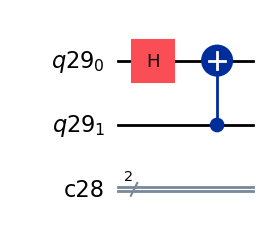

In [145]:
#minus phi

n_qubit = 2
qr5 = QuantumRegister(n_qubit)
cr5 = ClassicalRegister(n_qubit) #classical register to store resulting bits
qc5 = QuantumCircuit(qr5,cr5) #quantum circuit with quantum and classical registers

qc5.h(qr5[0])
qc5.cx(qr5[1],qr5[0])

qc5.draw('mpl')

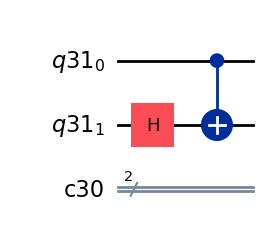

In [149]:
#plus psi
n_qubit = 2
qr5 = QuantumRegister(n_qubit)
cr5 = ClassicalRegister(n_qubit) #classical register to store resulting bits
qc5 = QuantumCircuit(qr5,cr5) #quantum circuit with quantum and classical registers

qc5.h(qr5[1])
qc5.cx(qr5[0],qr5[1])

qc5.draw('mpl')

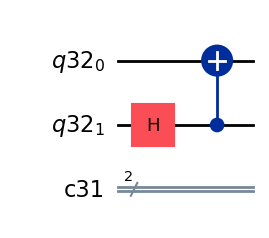

In [151]:
#minus psi
n_qubit = 2
qr5 = QuantumRegister(n_qubit)
cr5 = ClassicalRegister(n_qubit) #classical register to store resulting bits
qc5 = QuantumCircuit(qr5,cr5) #quantum circuit with quantum and classical registers

qc5.h(qr5[1])
qc5.cx(qr5[1],qr5[0])

qc5.draw('mpl')